### Data Import

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("telecom_churn_data.csv")

In [3]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


### Data Cleaning

#### Column Deletion : Columns which do not contribute with any information or having 0 variance

In [5]:
columns= ['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'
         ,'last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7'
         ,'date_of_last_rech_data_8','date_of_last_rech_data_9']

In [6]:
# As Date Columns do not contribute much to our churn detection. so dropping the columns
df=df.drop(columns=columns)

In [7]:
df.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100          NaN   
1     7001865778   34.047  355.074  268.321   86.285        24.11   
2     7001625959  167.690  189.058  210.226  290.714        11.54   
3     7001204172  221.338  251.102  508.054  389.500        99.91   
4     7000142493  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  ...  sachet_3g_9  \
0          NaN         0.00          NaN           NaN  ...            0   
1        78.68         7.68        18.34         15.74  ...            0   
2        55.24        37.26        74.81        143.33  ...            0   
3        54.39       310.98       241.71        123.31  ...            0   
4       149.44        83.89        58.78         76.96  ...            0   

   fb_user_6  fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  \
0        1.0        1.0        1.0        NaN   968        30.4         0.0   
1        NaN        1.0        1.0        NaN  1006         0.0         0.0   
2        NaN        NaN        NaN        1.0  1103         0.0         0.0   
3        NaN        NaN        NaN        NaN  2491         0.0         0.0   
4        0.0        NaN        NaN        NaN  1526         0.0         0.0   

   jun_vbc_3g  sep_vbc_3g  
0      101.20        3.58  
1        0.00        0.00  
2        4.17        0.00  
3        0.00        0.00  
4        0.00        0.00  

[5 rows x 210 columns]

#### Deleting Column which have >50% missing data

In [8]:
# Checking null percentage in each column
x=df.isna().mean().sort_values()*100

In [9]:
x.tail(50)
# there are columns with null value percentage as high as 70%

spl_ic_mou_9           7.745077
loc_og_t2m_mou_9       7.745077
loc_ic_t2m_mou_9       7.745077
std_og_t2t_mou_9       7.745077
std_ic_t2t_mou_9       7.745077
loc_ic_t2f_mou_9       7.745077
loc_og_mou_9           7.745077
loc_ic_t2t_mou_9       7.745077
std_ic_mou_9           7.745077
std_ic_t2o_mou_9       7.745077
std_ic_t2m_mou_9       7.745077
loc_og_t2f_mou_9       7.745077
loc_og_t2c_mou_9       7.745077
ic_others_9            7.745077
arpu_2g_8             73.660737
night_pck_user_8      73.660737
max_rech_data_8       73.660737
fb_user_8             73.660737
count_rech_2g_8       73.660737
av_rech_amt_data_8    73.660737
count_rech_3g_8       73.660737
arpu_3g_8             73.660737
total_rech_data_8     73.660737
fb_user_9             74.077741
count_rech_2g_9       74.077741
arpu_3g_9             74.077741
max_rech_data_9       74.077741
count_rech_3g_9       74.077741
night_pck_user_9      74.077741
arpu_2g_9             74.077741
total_rech_data_9     74.077741
av_rech_

In [10]:
# Finding all column with missing data>70%
y = pd.Series.to_frame(x)
columns = y[y[0]>50].index
columns

Index(['arpu_2g_8', 'night_pck_user_8', 'max_rech_data_8', 'fb_user_8',
       'count_rech_2g_8', 'av_rech_amt_data_8', 'count_rech_3g_8', 'arpu_3g_8',
       'total_rech_data_8', 'fb_user_9', 'count_rech_2g_9', 'arpu_3g_9',
       'max_rech_data_9', 'count_rech_3g_9', 'night_pck_user_9', 'arpu_2g_9',
       'total_rech_data_9', 'av_rech_amt_data_9', 'max_rech_data_7',
       'arpu_3g_7', 'count_rech_3g_7', 'av_rech_amt_data_7', 'arpu_2g_7',
       'night_pck_user_7', 'total_rech_data_7', 'count_rech_2g_7', 'fb_user_7',
       'av_rech_amt_data_6', 'count_rech_3g_6', 'count_rech_2g_6', 'arpu_3g_6',
       'arpu_2g_6', 'night_pck_user_6', 'total_rech_data_6', 'fb_user_6',
       'max_rech_data_6'],
      dtype='object')

In [11]:
# Deleting all columns with missing value
df=df.drop(columns=columns)

In [12]:
df.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100          NaN   
1     7001865778   34.047  355.074  268.321   86.285        24.11   
2     7001625959  167.690  189.058  210.226  290.714        11.54   
3     7001204172  221.338  251.102  508.054  389.500        99.91   
4     7000142493  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  ...  monthly_3g_9  \
0          NaN         0.00          NaN           NaN  ...             0   
1        78.68         7.68        18.34         15.74  ...             0   
2        55.24        37.26        74.81        143.33  ...             0   
3        54.39       310.98       241.71        123.31  ...             0   
4       149.44        83.89        58.78         76.96  ...             0   

   sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_3g_9   aon  aug_vbc_3g  \
0            0            0            0            0   968        30.4   
1            0            0            0            0  1006         0.0   
2            0            0            0            0  1103         0.0   
3            0            0            0            0  2491         0.0   
4            0            0            0            0  1526         0.0   

   jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0         0.0      101.20        3.58  
1         0.0        0.00        0.00  
2         0.0        4.17        0.00  
3         0.0        0.00        0.00  
4         0.0        0.00        0.00  

[5 rows x 174 columns]

#### Finding rows with missing data

In [13]:
# Checking null percentage in each row
x=df.isna().mean(axis=1).sort_values()*100

In [14]:
y = pd.Series.to_frame(x)
rows = y[y[0]>50].index
rows

Int64Index([20257,  3758,  3682, 95032, 95004, 86112, 87501, 86280, 94906,
            86132,
            ...
            75929, 36592, 75856, 75849, 36807, 36927, 37097, 37108, 36562,
            48740],
           dtype='int64', length=1018)

In [15]:
# deleting rows with >50% missing data
df=df.drop(rows)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98981 entries, 0 to 99998
Columns: 174 entries, mobile_number to sep_vbc_3g
dtypes: float64(140), int64(34)
memory usage: 132.2 MB


### Remaining data can be imputed using KNN technique
#### Note: To use KNN, you must have scikit-learn: 0.22 , and it will take a lot of time to execute

In [17]:
##from sklearn.impute import KNNImputer
##imputer = KNNImputer(n_neighbors=3)
##h=imputer.fit_transform(df)
# As all remaining data is continous, KNN should impute data by finding the position of point in dataspace, and check it's
# neigbours to impute current point data

In [18]:
#  Lets check the percentage of missing value
##df2=pd.DataFrame(data = h, columns = df.columns)
##df2.isna().mean().sort_values()
# Both minimum and maximum values are 0. We have successfully imputed the data

### Using KNN Leads to only 0.7% churned class data. (As it mostly filled non-zero values.) 
#### So we will be using simple imputer here, and fill all missing values with 0

In [19]:
from sklearn.impute import SimpleImputer
imp_zero = SimpleImputer(missing_values=np.nan, strategy='constant')
i=imp_zero.fit_transform(df)
df2=pd.DataFrame(data = i, columns = df.columns)
df2.isna().mean().sort_values()

mobile_number       0.0
std_ic_mou_8        0.0
std_ic_mou_9        0.0
total_ic_mou_6      0.0
total_ic_mou_7      0.0
                   ... 
std_og_mou_9        0.0
isd_og_mou_6        0.0
isd_og_mou_7        0.0
std_og_t2c_mou_7    0.0
sep_vbc_3g          0.0
Length: 174, dtype: float64

### Finding High Value Customer

In [20]:
# Finding average monthly recharge in good phase.(6th and 7th month)
AvgTotalMonthlyRecharge = (df2['total_rech_amt_6']+df2['total_rech_amt_7'])/2
# Finding 70th percentile above which we will have high value customer
cutoff= AvgTotalMonthlyRecharge.quantile(q=0.7)
cutoff
# All users having AvgTotalMonthlyRecharge >= 370 will be high value customer

370.0

In [21]:
# Appending AvgTotalMonthlyRecharge with df2 and filtering rows which have AvgTotalMonthlyRecharge>370.0
hv_df= pd.concat([df2,AvgTotalMonthlyRecharge],axis=1)

In [22]:
# Renaming column
hv_df.rename(columns={0:'AvgTotalMonthlyRecharge'},inplace=True)

In [23]:
hv_df.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0   7.000843e+09  197.385  214.816  213.803   21.100         0.00   
1   7.001866e+09   34.047  355.074  268.321   86.285        24.11   
2   7.001626e+09  167.690  189.058  210.226  290.714        11.54   
3   7.001204e+09  221.338  251.102  508.054  389.500        99.91   
4   7.000142e+09  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  ...  sachet_3g_6  \
0         0.00         0.00         0.00          0.00  ...          0.0   
1        78.68         7.68        18.34         15.74  ...          0.0   
2        55.24        37.26        74.81        143.33  ...          0.0   
3        54.39       310.98       241.71        123.31  ...          0.0   
4       149.44        83.89        58.78         76.96  ...          0.0   

   sachet_3g_7  sachet_3g_8  sachet_3g_9     aon  aug_vbc_3g  jul_vbc_3g  \
0          0.0          0.0          0.0   968.0        30.4         0.0   
1          0.0          0.0          0.0  1006.0         0.0         0.0   
2          0.0          0.0          0.0  1103.0         0.0         0.0   
3          0.0          0.0          0.0  2491.0         0.0         0.0   
4          0.0          0.0          0.0  1526.0         0.0         0.0   

   jun_vbc_3g  sep_vbc_3g  AvgTotalMonthlyRecharge  
0      101.20        3.58                    307.0  
1        0.00        0.00                    229.0  
2        4.17        0.00                    241.5  
3        0.00        0.00                    270.0  
4        0.00        0.00                    273.0  

[5 rows x 175 columns]

In [24]:
hv_df = hv_df[hv_df.AvgTotalMonthlyRecharge>=370]

In [25]:
hv_df.info()
# After filtering and data cleaning we have got 29.8k rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29793 entries, 7 to 98971
Columns: 175 entries, mobile_number to AvgTotalMonthlyRecharge
dtypes: float64(175)
memory usage: 40.0 MB


#### After filtering high value customer and data cleaning we have got 29.8k rows

### Finding Churn column

In [26]:
month9usageColumns = ['total_og_mou_9','total_ic_mou_9','vol_2g_mb_9','vol_3g_mb_9'] 
# If all incoming,outgoing, 2g usage, 3g usage and onnet and offnet usage is 0 then return 1 else return 0 
# in churned column

def getchurnValue(x):
     if x['onnet_mou_9']==0 and x.offnet_mou_9==0 and x.total_og_mou_9==0 and x.total_ic_mou_9==0 and x.vol_2g_mb_9==0 and x.vol_3g_mb_9==0:
        x['churned']=1
        return x['churned']

     else:
         x['churned']=0
         return x['churned']
#     print(row['onnet_mou_9'])
#     print("&&&&&&&&&&&&")
hv_df['churned']=hv_df.apply(lambda row: getchurnValue(row),axis=1)

In [27]:
hv_df.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
7    7.000702e+09  1069.180  1349.850  3171.480  500.000        57.84   
8    7.001525e+09   378.721   492.223   137.362  166.787       413.69   
13   7.002192e+09   492.846   205.671   593.260  322.732       501.76   
16   7.000876e+09   430.975   299.869   187.894  206.490        50.51   
17   7.000187e+09   690.008    18.980    25.499  257.583      1185.91   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  ...  sachet_3g_7  \
7         54.68        52.29         0.00        453.43  ...          0.0   
8        351.03        35.08        33.46         94.66  ...          0.0   
13       108.39       534.24       244.81        413.31  ...          0.0   
16        74.01        70.61        31.34        296.29  ...          0.0   
17         9.28         7.79       558.51         61.64  ...          0.0   

    sachet_3g_8  sachet_3g_9     aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
7           0.0          0.0   802.0       57.74       19.38       18.74   
8           0.0          0.0   315.0       21.03      910.65      122.16   
13          0.0          0.0  2607.0        0.00        0.00        0.00   
16          0.0          0.0   511.0        0.00        2.45       21.89   
17          0.0          0.0   667.0        0.00        0.00        0.00   

    sep_vbc_3g  AvgTotalMonthlyRecharge  churned  
7          0.0                   1185.0      1.0  
8          0.0                    519.0      0.0  
13         0.0                    380.0      0.0  
16         0.0                    459.0      0.0  
17         0.0                    408.0      0.0  

[5 rows x 176 columns]

### Calculating class imbalance

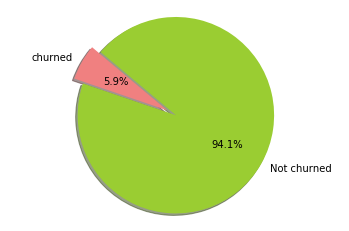

In [28]:
# Creating Pi-chart showing the respective classes
labels = 'churned', 'Not churned'
sizes = [hv_df[hv_df.churned==1].count().churned,hv_df[hv_df.churned==0].count().churned]
colors = ['lightcoral', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
 autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()


###### Only 6% people have churned, It is a situation of high class imbalance

#### Dropping all columns of 9th month

In [29]:
columns = ['arpu_9','onnet_mou_9','offnet_mou_9','roam_ic_mou_9','roam_og_mou_9','loc_og_t2t_mou_9','loc_og_t2m_mou_9'
          ,'loc_og_t2f_mou_9','loc_og_t2c_mou_9','loc_og_mou_9','std_og_t2t_mou_9','std_og_t2m_mou_9','std_og_t2f_mou_9'
          ,'std_og_t2c_mou_9','std_og_mou_9','isd_og_mou_9','spl_og_mou_9','og_others_9','total_og_mou_9','loc_ic_t2t_mou_9',
          'loc_ic_t2m_mou_9','loc_ic_t2f_mou_9','loc_ic_mou_9','std_ic_t2t_mou_9','std_ic_t2m_mou_9','std_ic_t2f_mou_9',
          'std_ic_t2o_mou_9','std_ic_mou_9','total_ic_mou_9','spl_ic_mou_9','isd_ic_mou_9','ic_others_9','total_rech_num_9'
          ,'total_rech_amt_9','max_rech_amt_9','last_day_rch_amt_9','vol_2g_mb_9','vol_3g_mb_9','monthly_2g_9','sachet_2g_9'
          ,'monthly_3g_9','sachet_3g_9','sep_vbc_3g']
df_final=hv_df.drop(columns=columns)
# Creating Mobile column as index
df_final=df_final.set_index('mobile_number')

### Adding derived Features
#### Adding 4 derived columns:
##### 1. outgoingIncomingRatio_good_phase
##### 2. outgoingIncomingRatio_action_phase
##### 3. voiceDataUsageRatio_good_phase
##### 4. voiceDataUsageRatio_action_phase

In [30]:
outgoingIncomingRatio_good_phase = (df_final['total_og_mou_6']+df_final['total_og_mou_7'])/(df_final['total_ic_mou_6']+df_final['total_ic_mou_7'])
outgoingIncomingRatio_action_phase = (df_final['total_og_mou_8'])/(df_final['total_ic_mou_8'])
voiceDataUsageRatio_good_phase = (df_final['total_og_mou_6']+df_final['total_og_mou_7']+df_final['total_ic_mou_6']+df_final['total_ic_mou_7'])/(df_final['vol_2g_mb_6']+df_final['vol_2g_mb_7']+df_final['vol_3g_mb_6']+df_final['vol_3g_mb_7'])
voiceDataUsageRatio_action_phase = (df_final['total_og_mou_8']+df_final['total_ic_mou_8'])/(df_final['vol_2g_mb_8']+df_final['vol_3g_mb_8'])


In [31]:
df_final= pd.concat([df_final,outgoingIncomingRatio_good_phase,outgoingIncomingRatio_action_phase,voiceDataUsageRatio_good_phase
                    ,voiceDataUsageRatio_action_phase],names=['outgoingIncomingRatio_good_phase','outgoingIncomingRatio_action_phase',
                                                             'voiceDataUsageRatio_good_phase','voiceDataUsageRatio_action_phase'],axis=1)

In [32]:
df_final.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
mobile_number                                                           
7.000702e+09   1069.180  1349.850  3171.480        57.84        54.68   
7.001525e+09    378.721   492.223   137.362       413.69       351.03   
7.002192e+09    492.846   205.671   593.260       501.76       108.39   
7.000876e+09    430.975   299.869   187.894        50.51        74.01   
7.000187e+09    690.008    18.980    25.499      1185.91         9.28   

               onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
mobile_number                                                          
7.000702e+09         52.29        453.43        567.16        325.91   
7.001525e+09         35.08         94.66         80.63        136.48   
7.002192e+09        534.24        413.31        119.28        482.46   
7.000876e+09         70.61        296.29        229.74        162.76   
7.000187e+09          7.79         61.64          0.00          5.54   

               roam_ic_mou_6  ...     aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
mobile_number                 ...                                               
7.000702e+09           16.23  ...   802.0       57.74       19.38       18.74   
7.001525e+09            0.00  ...   315.0       21.03      910.65      122.16   
7.002192e+09           23.53  ...  2607.0        0.00        0.00        0.00   
7.000876e+09            0.00  ...   511.0        0.00        2.45       21.89   
7.000187e+09            0.00  ...   667.0        0.00        0.00        0.00   

               AvgTotalMonthlyRecharge  churned          0          1  \
mobile_number                                                           
7.000702e+09                    1185.0      1.0   0.925935   0.816719   
7.001525e+09                     519.0      0.0   7.102531  10.372430   
7.002192e+09                     380.0      0.0   0.963468   0.887054   
7.000876e+09                     459.0      0.0   0.847807   0.792569   
7.000187e+09                     408.0      0.0  13.274658        NaN   

                      2             3  
mobile_number                          
7.000702e+09        inf           inf  
7.001525e+09   0.968761  1.571429e+01  
7.002192e+09        inf  1.079895e+05  
7.000876e+09        inf           inf  
7.000187e+09        inf           NaN  

[5 rows x 136 columns]

In [33]:
df_final.rename(columns={0:'outgoingIncomingRatio_good_phase',1:'outgoingIncomingRatio_action_phase',2:'voiceDataUsageRatio_good_phase',3:'voiceDataUsageRatio_action_phase'},inplace=True)

In [34]:
df_final.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
mobile_number                                                           
7.000702e+09   1069.180  1349.850  3171.480        57.84        54.68   
7.001525e+09    378.721   492.223   137.362       413.69       351.03   
7.002192e+09    492.846   205.671   593.260       501.76       108.39   
7.000876e+09    430.975   299.869   187.894        50.51        74.01   
7.000187e+09    690.008    18.980    25.499      1185.91         9.28   

               onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
mobile_number                                                          
7.000702e+09         52.29        453.43        567.16        325.91   
7.001525e+09         35.08         94.66         80.63        136.48   
7.002192e+09        534.24        413.31        119.28        482.46   
7.000876e+09         70.61        296.29        229.74        162.76   
7.000187e+09          7.79         61.64          0.00          5.54   

               roam_ic_mou_6  ...     aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
mobile_number                 ...                                               
7.000702e+09           16.23  ...   802.0       57.74       19.38       18.74   
7.001525e+09            0.00  ...   315.0       21.03      910.65      122.16   
7.002192e+09           23.53  ...  2607.0        0.00        0.00        0.00   
7.000876e+09            0.00  ...   511.0        0.00        2.45       21.89   
7.000187e+09            0.00  ...   667.0        0.00        0.00        0.00   

               AvgTotalMonthlyRecharge  churned  \
mobile_number                                     
7.000702e+09                    1185.0      1.0   
7.001525e+09                     519.0      0.0   
7.002192e+09                     380.0      0.0   
7.000876e+09                     459.0      0.0   
7.000187e+09                     408.0      0.0   

               outgoingIncomingRatio_good_phase  \
mobile_number                                     
7.000702e+09                           0.925935   
7.001525e+09                           7.102531   
7.002192e+09                           0.963468   
7.000876e+09                           0.847807   
7.000187e+09                          13.274658   

               outgoingIncomingRatio_action_phase  \
mobile_number                                       
7.000702e+09                             0.816719   
7.001525e+09                            10.372430   
7.002192e+09                             0.887054   
7.000876e+09                             0.792569   
7.000187e+09                                  NaN   

               voiceDataUsageRatio_good_phase  \
mobile_number                                   
7.000702e+09                              inf   
7.001525e+09                         0.968761   
7.002192e+09                              inf   
7.000876e+09                              inf   
7.000187e+09                              inf   

               voiceDataUsageRatio_action_phase  
mobile_number                                    
7.000702e+09                                inf  
7.001525e+09                       1.571429e+01  
7.002192e+09                       1.079895e+05  
7.000876e+09                                inf  
7.000187e+09                                NaN  

[5 rows x 136 columns]

In [35]:
import math
def handleInfiniteValues(x):
    if math.isnan(x):
        return 0;
    if math.isinf(x):
        return 1;
    return x;
df_final.outgoingIncomingRatio_good_phase=df_final.outgoingIncomingRatio_good_phase.apply(lambda x: handleInfiniteValues(x))
df_final.outgoingIncomingRatio_action_phase=df_final.outgoingIncomingRatio_action_phase.apply(lambda x: handleInfiniteValues(x))
df_final.voiceDataUsageRatio_good_phase=df_final.voiceDataUsageRatio_good_phase.apply(lambda x: handleInfiniteValues(x))
df_final.voiceDataUsageRatio_action_phase=df_final.voiceDataUsageRatio_action_phase.apply(lambda x: handleInfiniteValues(x))
df_final.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
mobile_number                                                           
7.000702e+09   1069.180  1349.850  3171.480        57.84        54.68   
7.001525e+09    378.721   492.223   137.362       413.69       351.03   
7.002192e+09    492.846   205.671   593.260       501.76       108.39   
7.000876e+09    430.975   299.869   187.894        50.51        74.01   
7.000187e+09    690.008    18.980    25.499      1185.91         9.28   

               onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
mobile_number                                                          
7.000702e+09         52.29        453.43        567.16        325.91   
7.001525e+09         35.08         94.66         80.63        136.48   
7.002192e+09        534.24        413.31        119.28        482.46   
7.000876e+09         70.61        296.29        229.74        162.76   
7.000187e+09          7.79         61.64          0.00          5.54   

               roam_ic_mou_6  ...     aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
mobile_number                 ...                                               
7.000702e+09           16.23  ...   802.0       57.74       19.38       18.74   
7.001525e+09            0.00  ...   315.0       21.03      910.65      122.16   
7.002192e+09           23.53  ...  2607.0        0.00        0.00        0.00   
7.000876e+09            0.00  ...   511.0        0.00        2.45       21.89   
7.000187e+09            0.00  ...   667.0        0.00        0.00        0.00   

               AvgTotalMonthlyRecharge  churned  \
mobile_number                                     
7.000702e+09                    1185.0      1.0   
7.001525e+09                     519.0      0.0   
7.002192e+09                     380.0      0.0   
7.000876e+09                     459.0      0.0   
7.000187e+09                     408.0      0.0   

               outgoingIncomingRatio_good_phase  \
mobile_number                                     
7.000702e+09                           0.925935   
7.001525e+09                           7.102531   
7.002192e+09                           0.963468   
7.000876e+09                           0.847807   
7.000187e+09                          13.274658   

               outgoingIncomingRatio_action_phase  \
mobile_number                                       
7.000702e+09                             0.816719   
7.001525e+09                            10.372430   
7.002192e+09                             0.887054   
7.000876e+09                             0.792569   
7.000187e+09                             0.000000   

               voiceDataUsageRatio_good_phase  \
mobile_number                                   
7.000702e+09                         1.000000   
7.001525e+09                         0.968761   
7.002192e+09                         1.000000   
7.000876e+09                         1.000000   
7.000187e+09                         1.000000   

               voiceDataUsageRatio_action_phase  
mobile_number                                    
7.000702e+09                           1.000000  
7.001525e+09                          15.714286  
7.002192e+09                      107989.500000  
7.000876e+09                           1.000000  
7.000187e+09                           0.000000  

[5 rows x 136 columns]

### EDA

#### Finding in the churned USers, how much people were actually using outgoing more than incoming and vice versa. vs complete dataset

Users who have more outgoing are called callers.
Similarly users having more incoming are called revievers

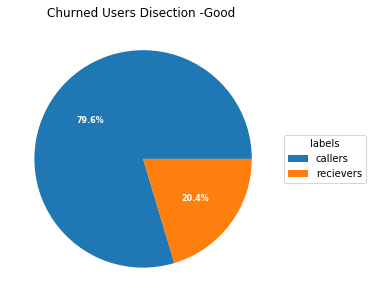

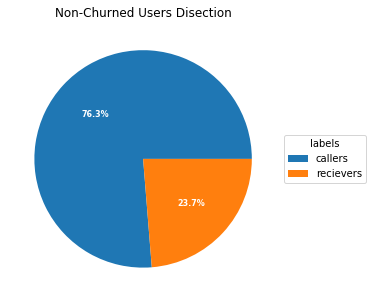

In [36]:
def createPiPlot(data,labels,title):
    fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))
    
    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
    ax.legend(wedges, labels,
          title="labels",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=8, weight="bold")

    ax.set_title(title)

    plt.show()


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

data = [df_final[(df_final.churned==1 )& (df_final.outgoingIncomingRatio_good_phase>1)].count().churned,df_final[(df_final.churned==1) & (df_final.outgoingIncomingRatio_good_phase<1)].count().churned]
labels = ['callers','recievers']
createPiPlot(data,labels,"Churned Users Disection -Good ")

data2 = [df_final[(df_final.churned==0 )&(df_final.outgoingIncomingRatio_good_phase>1)].count().churned,df_final[(df_final.churned==0 )&(df_final.outgoingIncomingRatio_good_phase<1)].count().churned]
createPiPlot(data2,labels,"Non-Churned Users Disection")

#### The callers and recievers seems to have similar distribution in both churning customer and non-churning customer in GOOD phase.
####  

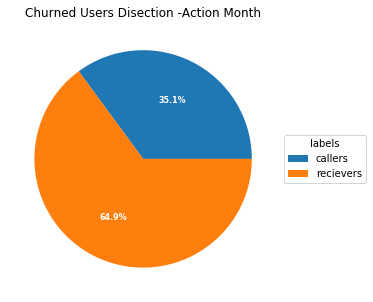

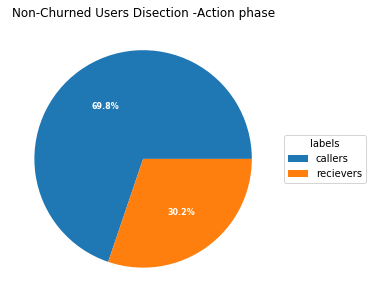

In [37]:
data = [df_final[(df_final.churned==1 )& (df_final.outgoingIncomingRatio_action_phase>1)].count().churned,df_final[(df_final.churned==1) & (df_final.outgoingIncomingRatio_action_phase<1)].count().churned]
labels = ['callers','recievers']
createPiPlot(data,labels,"Churned Users Disection -Action Month")

data2 = [df_final[(df_final.churned==0 )&(df_final.outgoingIncomingRatio_action_phase>1)].count().churned,df_final[(df_final.churned==0 )&(df_final.outgoingIncomingRatio_action_phase<1)].count().churned]
createPiPlot(data2,labels,"Non-Churned Users Disection -Action phase")

### People Actually reduced using outgoing service in Action month before getting churned. Precentage of callers reduce from 79.6% to 35.1% (More than Half)

## So sudden drop in outgoing call in action phase can be a sign of churn

#### Users having more data usage are called *data similarly users with more voice usage are called *voice

##### USer is voice if voiceDataUsageRatio_good_phase>1
##### User is data if voiceDataUsageRatio_good_phase<1

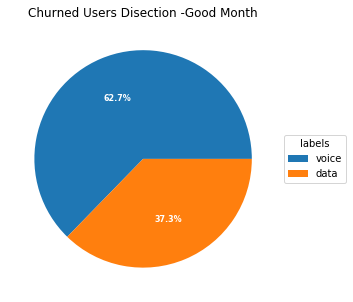

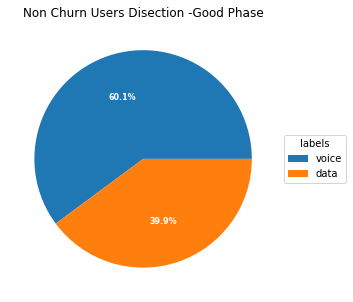

In [38]:
data = [df_final[(df_final.churned==1 )& (df_final.voiceDataUsageRatio_good_phase>1)].count().churned,df_final[(df_final.churned==1) & (df_final.voiceDataUsageRatio_good_phase<1)].count().churned]
labels = ['voice','data']
createPiPlot(data,labels,"Churned Users Disection -Good Month")

data2 = [df_final[(df_final.churned==0 )&(df_final.voiceDataUsageRatio_good_phase>1)].count().churned,df_final[(df_final.churned==0 )&(df_final.voiceDataUsageRatio_good_phase<1)].count().churned]
createPiPlot(data2,labels,"Non Churn Users Disection -Good Phase")

### Similar Distribution of voice and Data user among Churn and Non-Churn Users.  Churned Users have slightly more distribution of voice users than in whole dataset

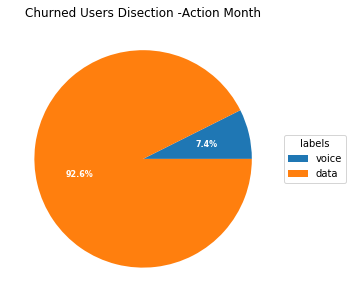

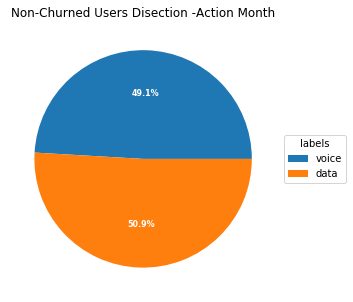

In [39]:
data = [df_final[(df_final.churned==1 )& (df_final.voiceDataUsageRatio_action_phase>1)].count().churned,df_final[(df_final.churned==1) & (df_final.voiceDataUsageRatio_action_phase<1)].count().churned]
labels = ['voice','data']
createPiPlot(data,labels,"Churned Users Disection -Action Month")

data2 = [df_final[(df_final.churned==0 )&(df_final.voiceDataUsageRatio_action_phase>1)].count().churned,df_final[(df_final.churned==0 )&(df_final.voiceDataUsageRatio_action_phase<1)].count().churned]
createPiPlot(data2,labels,"Non-Churned Users Disection -Action Month")

#### In similar trend voice services has been drastically reduced in action phase by churn customers

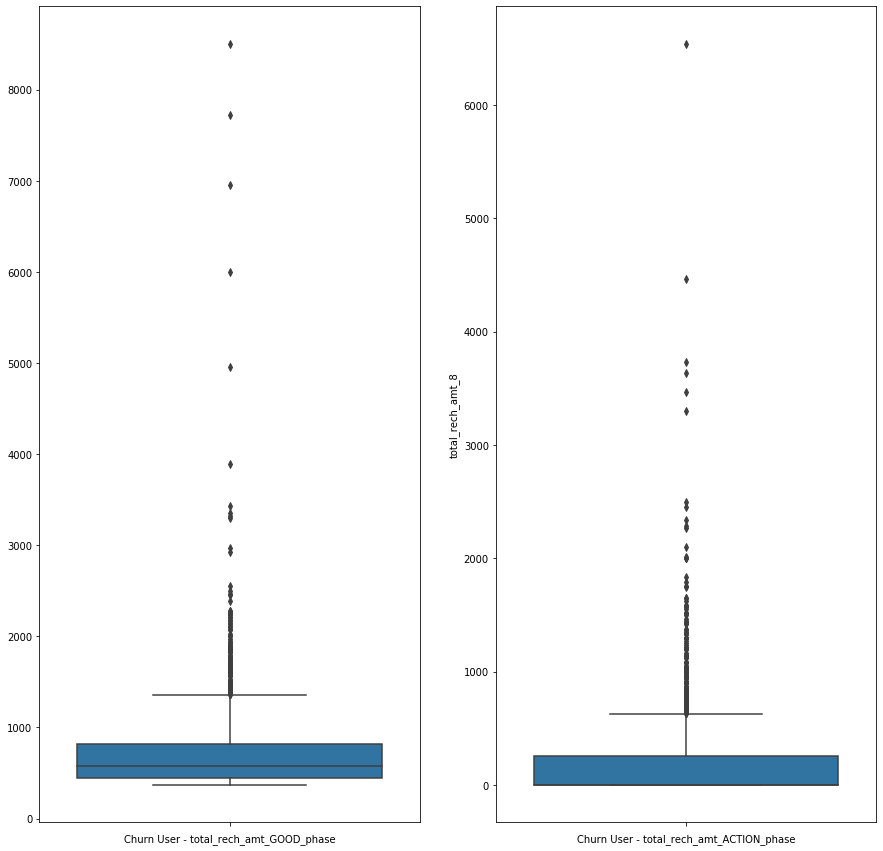

In [40]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,15))
sns.boxplot(y=(df_final[(df_final.churned==1 )].total_rech_amt_6+df_final[(df_final.churned==1 )].total_rech_amt_7)/2 , ax=ax1).set(xlabel='Churn User - total_rech_amt_GOOD_phase')
sns.boxplot(y=(df_final[(df_final.churned==1 )].total_rech_amt_8),ax=ax2).set(xlabel='Churn User - total_rech_amt_ACTION_phase')
plt.show()

### Total Recharge amount decreases significantly in Action phase for churn customer.
Box plot is narrow and reduced in action phase then good phase

In [41]:
total_Data_usage_for_churn_good_phase = ((df_final[df_final.churned==1].vol_2g_mb_6+df_final[df_final.churned==1].vol_2g_mb_7+df_final[df_final.churned==1].vol_3g_mb_6 + df_final[df_final.churned==1].vol_3g_mb_7)/2).mean()
total_Data_usage_for_churn_action_phase= (df_final[df_final.churned==1].vol_2g_mb_8+df_final[df_final.churned==1].vol_3g_mb_8).mean()
total_Data_usage_for_NONchurn_good_phase = ((df_final[df_final.churned==0].vol_2g_mb_6+df_final[df_final.churned==0].vol_2g_mb_7+df_final[df_final.churned==0].vol_3g_mb_6 + df_final[df_final.churned==0].vol_3g_mb_7)/2).mean()
total_Data_usage_for_NONchurn_action_phase= (df_final[df_final.churned==0].vol_2g_mb_8+df_final[df_final.churned==0].vol_3g_mb_8).mean()



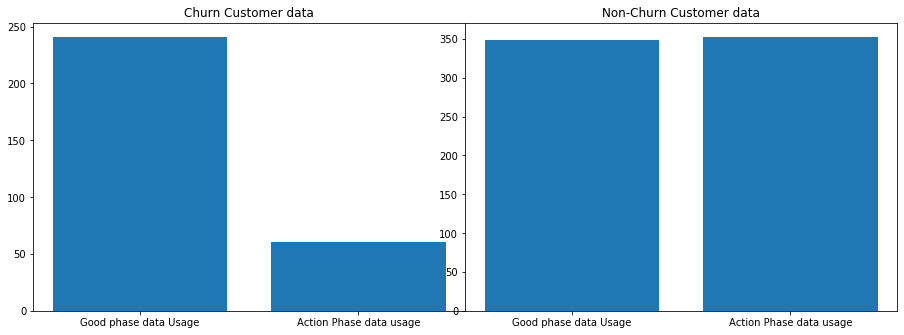

In [42]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1],title='Churn Customer data')
ax2 = fig.add_axes([1,0,1,1],title='Non-Churn Customer data')
data1 = [total_Data_usage_for_churn_good_phase,total_Data_usage_for_churn_action_phase]
label=['Good phase data Usage','Action Phase data usage']
data2 = [total_Data_usage_for_NONchurn_good_phase,total_Data_usage_for_NONchurn_action_phase]
ax1.bar(label,data1)
ax2.bar(label,data2)
plt.show()

### Significant reduction in data usage of customer going to churn in action phase

In [43]:
# X-Y split
dff=df_final
y= dff.pop('churned')
X=dff

### Class Imbalance handling : Using SMOTE 

In [44]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

C:\Users\arunb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\arunb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\arunb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

Number transactions X_train dataset:  (20855, 135)
Number transactions y_train dataset:  (20855,)
Number transactions X_test dataset:  (8938, 135)
Number transactions y_test dataset:  (8938,)


C:\Users\arunb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\arunb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\arunb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in 

In [45]:
# Scaling data
from sklearn import preprocessing
scaler =preprocessing.StandardScaler().fit(X_train)
X_train=pd.DataFrame(scaler.transform(X_train), columns= X_train.columns)

In [46]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))


Before OverSampling, counts of label '1': 1246
Before OverSampling, counts of label '0': 19609 



C:\Users\arunb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (39218, 135)
After OverSampling, the shape of train_y: (39218,) 

After OverSampling, counts of label '1': 19609
After OverSampling, counts of label '0': 19609


In [47]:
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 -0.169059 -0.280367  0.360027    -0.018392    -0.263276    -0.127245   
1 -0.309442 -0.721672 -0.366879    -0.482053    -0.424204    -0.439485   
2 -0.027679 -0.170128  0.241718    -0.494477    -0.509840    -0.409974   
3 -0.007353 -0.725598 -0.408948     0.061645    -0.259311    -0.099937   
4  1.129824  2.557392  3.459137    -0.639535    -0.579846    -0.544164   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  sachet_3g_8  \
0     -0.574579     -0.679532     -0.473174      -0.223353  ...     3.869406   
1     -0.396433     -0.395914     -0.486342      -0.223353  ...    -0.142798   
2     -0.176984     -0.258095     -0.217597      -0.223353  ...    -0.142798   
3     -0.648386     -0.827529     -0.729537      -0.223353  ...    -0.142798   
4      0.076007     -0.224648     -0.185952      -0.223353  ...    -0.142798   

        aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  AvgTotalMonthlyRecharge  \
0 -0.091154   -0.329455   -0.330380   -0.309152                -0.276701   
1 -0.187857   -0.329455   -0.330380   -0.309152                -0.585712   
2 -0.808197    1.041250    1.497510   -0.309152                -0.151673   
3 -0.628165   -0.329455   -0.330380   -0.309152                -0.436289   
4 -0.240324   -0.280741   -0.325797   -0.309152                 0.661515   

   outgoingIncomingRatio_good_phase  outgoingIncomingRatio_action_phase  \
0                         -0.038414                           -0.050166   
1                         -0.038537                           -0.054047   
2                         -0.038990                           -0.051071   
3                         -0.023230                           -0.018890   
4                         -0.036284                           -0.045066   

   voiceDataUsageRatio_good_phase  voiceDataUsageRatio_action_phase  
0                       -0.057369                         -0.057698  
1                       -0.057304                         -0.057774  
2                       -0.057396                         -0.057807  
3                       -0.057388                         -0.057714  
4                       -0.057369                         -0.057714  

[5 rows x 135 columns]

In [48]:
# Saclaing test data
X_test=pd.DataFrame(scaler.transform(X_test), columns= X_test.columns)

## Data Modeling - Feature Selection

### Logistic Regression

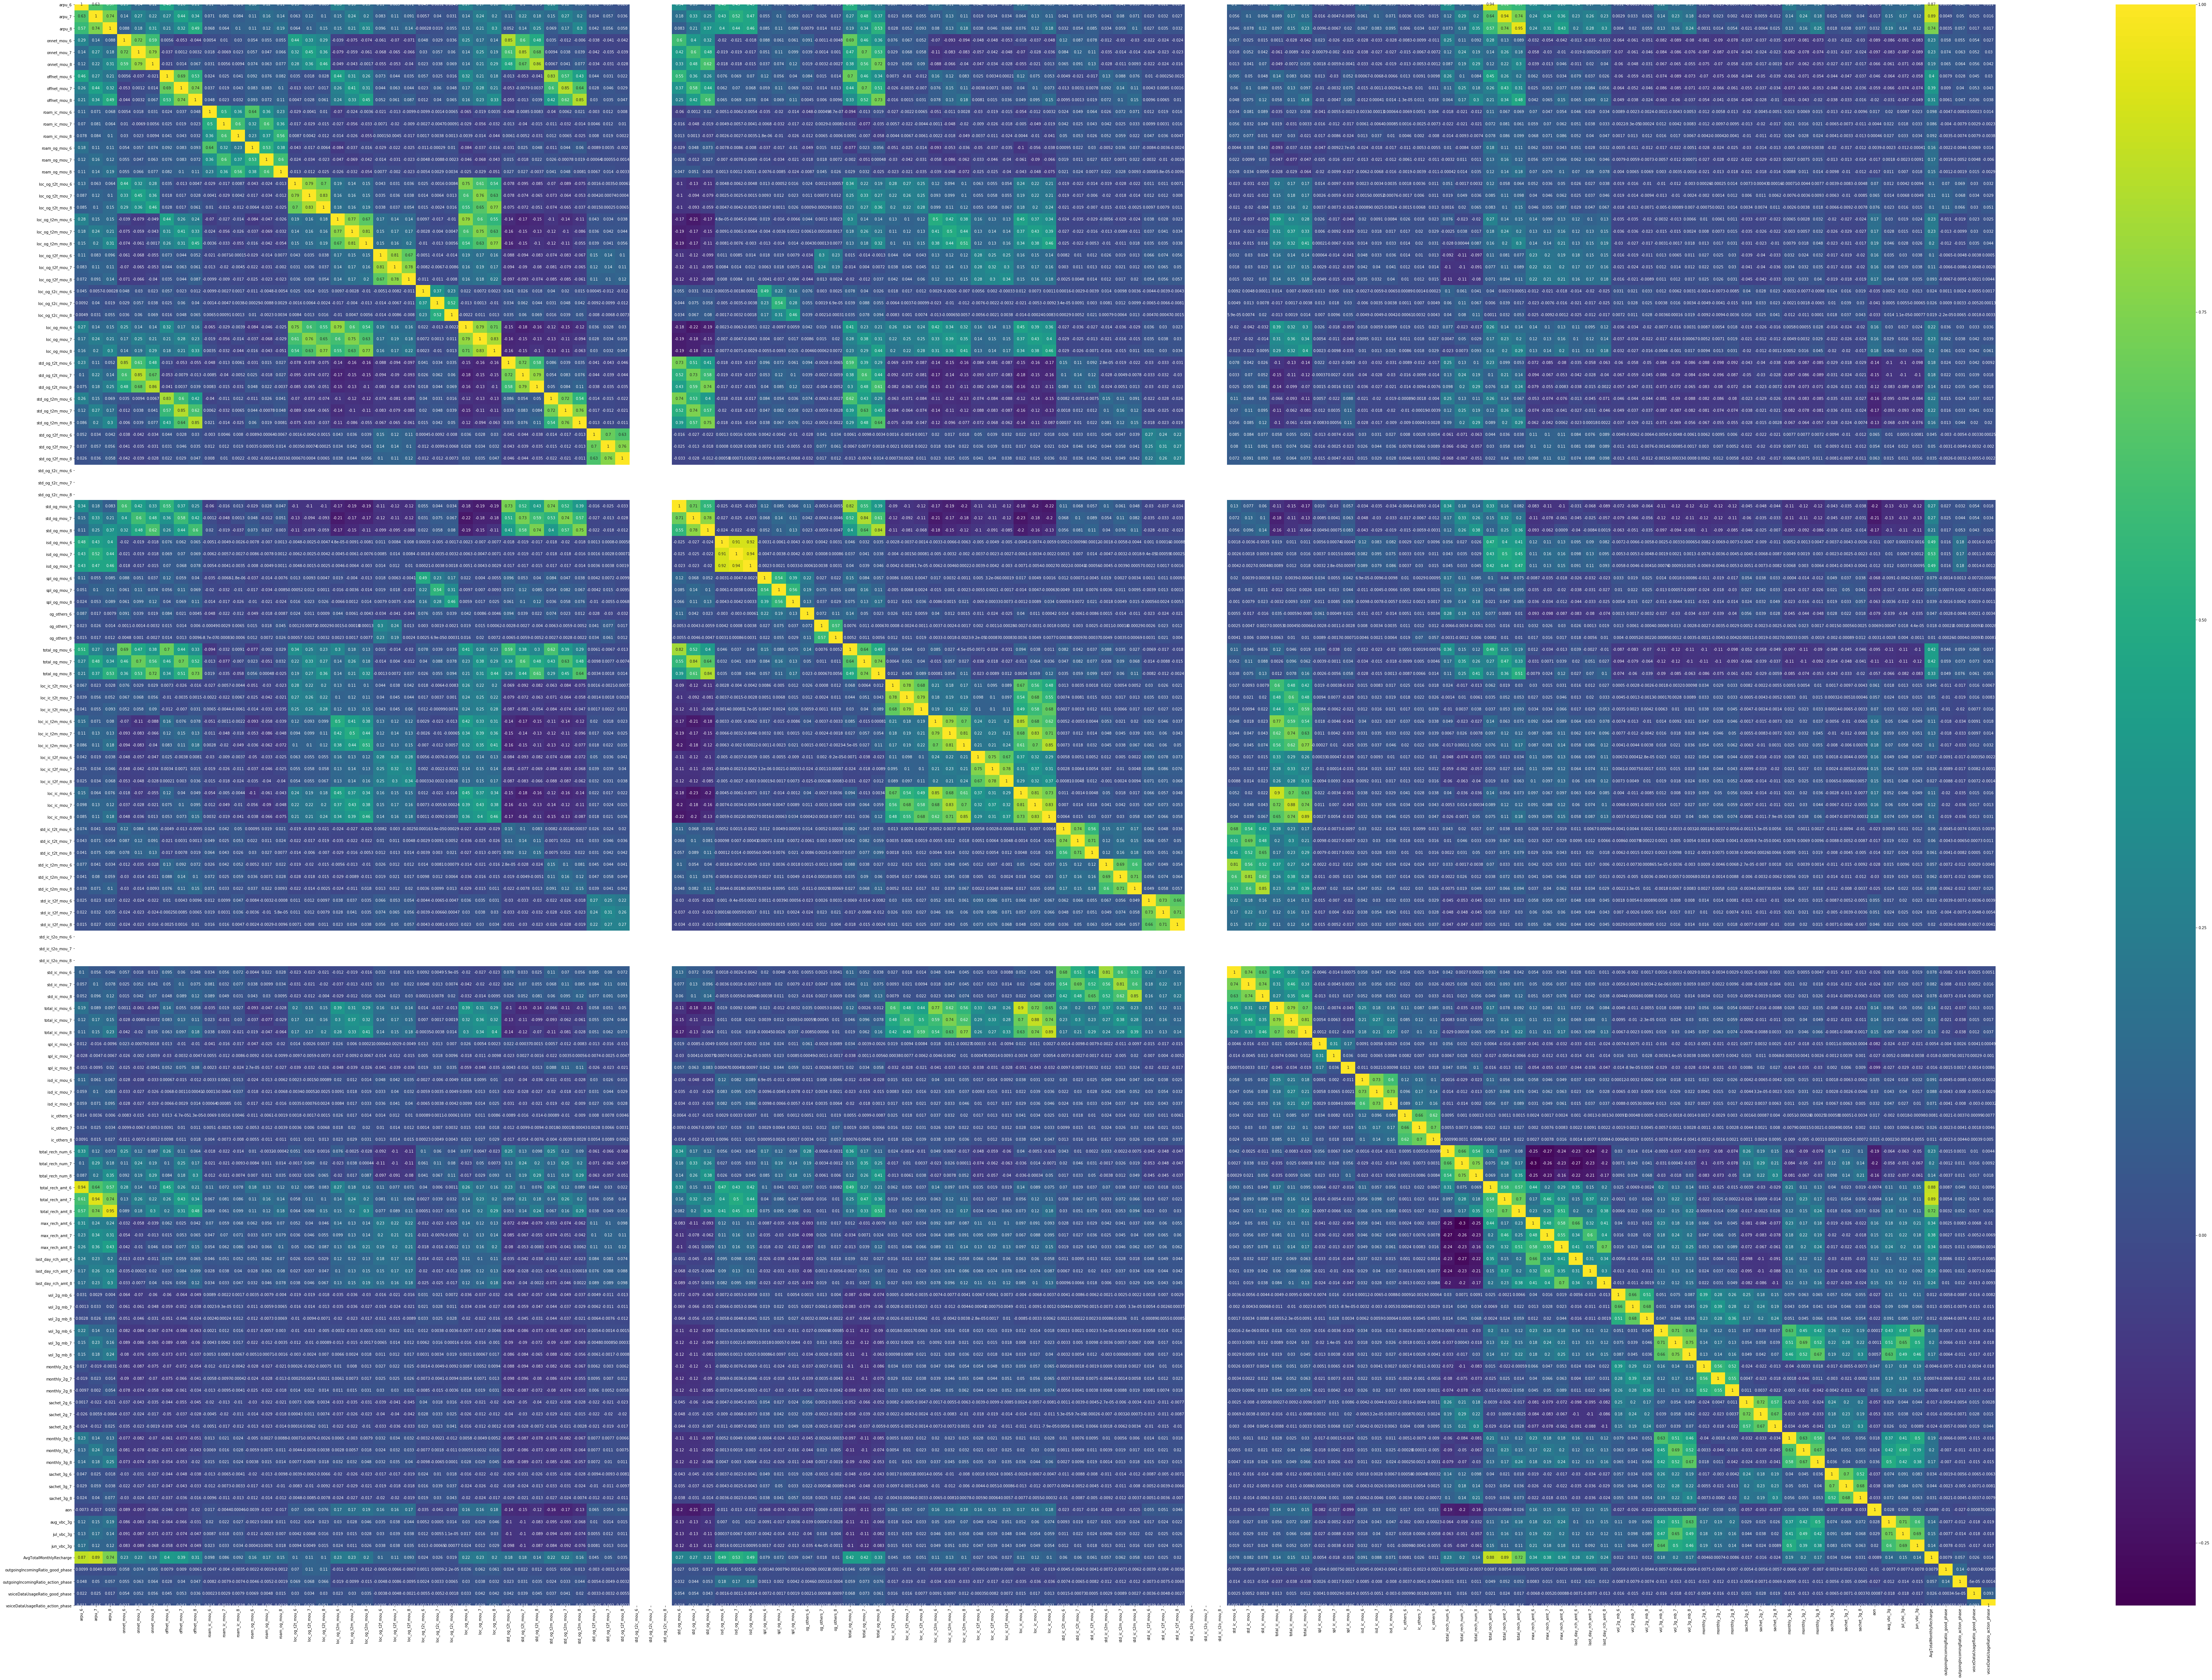

In [49]:
# Checking Heat map
fig= plt.figure()
ax1=fig.add_axes([0,0,15,15])
sns.heatmap(data= X.corr(), annot=True, cmap='viridis',axes=ax1)
plt.show()
# There seem to be small -small pockets of corellated features. Mostly features are not co-related

In [50]:
# Using RFE with Logistic Regression. Using hard coded value of C=1 and features =15
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1, max_iter=1000)
rfe = RFE(n_features_to_select=15,estimator=lr)
rfe.fit(X_train_res,y_train_res)
y_pred=rfe.predict(X_test)


In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[6906, 1528],
       [  88,  416]], dtype=int64)

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.8191989259342135
0.8253968253968254
0.8221126882497525


### Plotting ROC curve

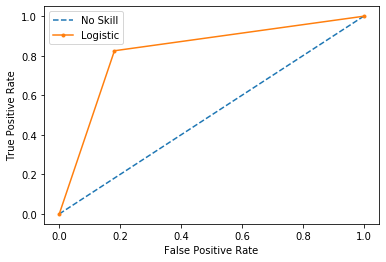

In [53]:
from sklearn.metrics import roc_curve
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [54]:
X_train_res = pd.DataFrame(X_train_res, columns=X_train.columns)

In [55]:
#Check out important features chosen by RFE
# pd.DataFrame(rfe.ranking_)
# type()
z=pd.concat([pd.DataFrame(X_train_res.columns),pd.DataFrame(rfe.ranking_)],axis=1)
z.columns=[0,1]
z.sort_values(by=1).head(20)

0  1
17     loc_og_t2t_mou_8  1
61     loc_ic_t2m_mou_7  1
59     loc_ic_t2t_mou_8  1
107  last_day_rch_amt_8  1
68         loc_ic_mou_8  1
98     total_rech_num_8  1
62     loc_ic_t2m_mou_8  1
8          offnet_mou_8  1
116        monthly_2g_8  1
5           onnet_mou_8  1
89         spl_ic_mou_8  1
125         sachet_3g_8  1
32     std_og_t2t_mou_8  1
1                arpu_7  1
122        monthly_3g_8  1
110         vol_2g_mb_8  2
126                 aon  3
35     std_og_t2m_mou_8  4
83         std_ic_mou_8  5
84       total_ic_mou_6  6

### Using These 15 features and Grid Search for LOGISTIC REGRESSION

In [56]:
# Taking out RFE selected top 15 features for analysis
features=['monthly_2g_8','total_ic_mou_8', 'sachet_3g_8','spl_ic_mou_8','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8',
         'monthly_3g_8','offnet_mou_8','onnet_mou_8','std_og_mou_8','std_og_t2t_mou_8','last_day_rch_amt_8','arpu_7',
         'total_rech_num_8','loc_og_t2t_mou_8']
X_lr_train =X_train_res[features]

In [57]:
### Using Grid Search for finding value of C
params = {'C': [0.001, 0.1, 1,10,100,1000 ]}
from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=lr,
                     param_grid=params,
                     scoring='recall',
                     cv=5,
                     n_jobs=-1,
                     return_train_score=True,
                     verbose = 1)


In [58]:
gd_sr.fit(X_lr_train,y_train_res)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.5s finished


GridSearchCV(cv=5, estimator=LogisticRegression(C=1, max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [59]:
cv_results = pd.DataFrame(gd_sr.cv_results_)
cv_results.head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.100134      0.003918         0.009375        0.000489   0.001   
1       0.234686      0.012293         0.009774        0.000399     0.1   
2       0.268283      0.019371         0.009574        0.001198       1   
3       0.290423      0.027468         0.009176        0.000401      10   
4       0.276659      0.029238         0.008378        0.001352     100   
5       0.229185      0.034104         0.005783        0.000399    1000   

         params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.001}           0.864610           0.874299           0.871749   
1    {'C': 0.1}           0.867670           0.876339           0.872004   
2      {'C': 1}           0.865120           0.876849           0.872004   
3     {'C': 10}           0.865375           0.876594           0.871749   
4    {'C': 100}           0.865885           0.877104           0.871749   
5   {'C': 1000}           0.865885           0.877104           0.871749   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.872226  ...         0.872151        0.004344                6   
1           0.872992  ...         0.873935        0.004360                1   
2           0.871971  ...         0.873374        0.005312                4   
3           0.872482  ...         0.873272        0.004977                5   
4           0.872737  ...         0.873527        0.004879                2   
5           0.872737  ...         0.873527        0.004879                2   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.873271            0.872123            0.871358   
1            0.873717            0.873653            0.874418   
2            0.872888            0.873143            0.874100   
3            0.872633            0.873080            0.873845   
4            0.872633            0.873016            0.873845   
5            0.872633            0.873016            0.873845   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.871367            0.871932          0.872010         0.000700  
1            0.873725            0.874737          0.874050         0.000443  
2            0.872833            0.873972          0.873387         0.000541  
3            0.872896            0.873335          0.873158         0.000413  
4            0.873024            0.873526          0.873209         0.000426  
5            0.873024            0.873526          0.873209         0.000426  

[6 rows x 21 columns]

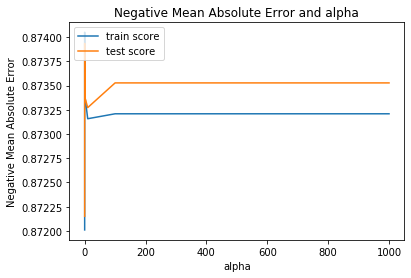

In [60]:
# plotting mean test and train scoes with alpha 
cv_results['param_C'] = cv_results['param_C'].astype('int32')

# plotting
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


### The best result is obtained at lower value of C, at C=0.1, Although , more or less all results are equivalent 

In [61]:
# Creating a logistic Regression Model with 15 selected feature using RFE, and C=0.1 found via Grid search

lr2 = LogisticRegression(C=0.1)
lr2.fit(X_lr_train,y_train_res)
X_lr_test = X_test[features]
y_pred=lr2.predict(X_lr_test)

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[6923, 1511],
       [  91,  413]], dtype=int64)

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.8207652718729023
0.8194444444444444
0.8201443232419044


### Here Recall is 81.94% and Accuracy is 82% and ROC is also 82%

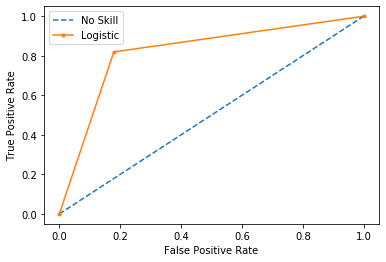

In [64]:
# Plotting ROC
from sklearn.metrics import roc_curve
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [65]:
x=pd.concat([pd.DataFrame(features),pd.DataFrame(np.transpose(lr2.coef_))],axis=1)
x.columns=['feature','weight']
x.sort_values('weight')

feature    weight
5     loc_ic_t2m_mou_8 -1.927044
8          onnet_mou_8 -1.890700
7         offnet_mou_8 -1.134970
11  last_day_rch_amt_8 -1.058021
0         monthly_2g_8 -0.833959
1       total_ic_mou_8 -0.781702
3         spl_ic_mou_8 -0.674510
6         monthly_3g_8 -0.640894
13    total_rech_num_8 -0.580713
2          sachet_3g_8 -0.547610
14    loc_og_t2t_mou_8  0.401600
12              arpu_7  0.586403
10    std_og_t2t_mou_8  0.608202
9         std_og_mou_8  0.869553
4     loc_ic_t2m_mou_7  0.908022

Top Features given By RFE contains:
    1. total_ic_mou_8 - Total Incomming of Month 8
    2. monthly_3g_8 and monthly_2g_8 - Total data usage in month 8
    3. offnet_mou_8 and onnet_mou_8 - Total minute of use in month 8
    4. total_rech_num_8 and last_day_rch_amt_8 - Total number of recharge in month 8 and last reacharge of month 8
    5. arpu_7 - Average revenue per user in month 7
    
However higest weightage is given to features:
    1. loc_ic_t2m_mou_8 - Local incomming telephone to mobile minute of use in month 8
    2. offnet_mou_8 and onnet_mou_8 - Total minute of use in month 8
    3. last_day_rch_amt_8 - Last Day Recharge amount
    4. monthly_2g_8 - Monthly 2g usage
    5. total_ic_mou_8 -  Total incomming

## Data Modeling - Feature Selection Using Decison Tree

In [66]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=5)

In [67]:
y_pred=dt_default.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[7269 1165]
 [ 123  381]]
0.8558961736406355
0.7559523809523809
0.808910503969195


##### Using Grid search to tune Hyperparameter max_depth

In [68]:
params={'max_depth':[3,5,8,10,15,20]}
gd= GridSearchCV(estimator=DecisionTreeClassifier(),
                     param_grid=params,
                     scoring='recall',
                     cv=5,
                     n_jobs=-1,
                     return_train_score=True,
                     verbose = 1)
gd.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   16.0s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 8, 10, 15, 20]},
             return_train_score=True, scoring='recall', verbose=1)

In [69]:
cv_results = pd.DataFrame(gd.cv_results_)
cv_results.head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.490859      0.012856         0.015758        0.000747   
1       2.288846      0.026133         0.015359        0.000798   
2       3.461469      0.057586         0.016955        0.003025   
3       4.212365      0.127492         0.015958        0.001262   
4       5.433879      0.204614         0.014761        0.000399   
5       5.056774      0.407929         0.010575        0.002239   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               3   {'max_depth': 3}           0.831464           0.842682   
1               5   {'max_depth': 5}           0.849822           0.862570   
2               8   {'max_depth': 8}           0.861805           0.917644   
3              10  {'max_depth': 10}           0.881438           0.932177   
4              15  {'max_depth': 15}           0.898011           0.959459   
5              20  {'max_depth': 20}           0.898776           0.955890   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.872259           0.866106  ...         0.855832        0.015869   
1           0.888322           0.884213  ...         0.876282        0.017344   
2           0.916879           0.934200  ...         0.913714        0.027319   
3           0.946201           0.948993  ...         0.930543        0.025212   
4           0.964049           0.953838  ...         0.946709        0.024565   
5           0.966854           0.958174  ...         0.947678        0.024731   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.864346            0.847262   
1                5            0.896666            0.861414   
2                4            0.942819            0.928221   
3                3            0.969338            0.954803   
4                2            0.995219            0.992669   
5                1            0.999745            0.999108   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.865111            0.855495            0.855613   
1            0.883407            0.882968            0.883853   
2            0.921782            0.946137            0.941480   
3            0.962708            0.968192            0.954803   
4            0.992988            0.994327            0.991330   
5            0.999363            0.998661            0.998789   

   mean_train_score  std_train_score  
0          0.857565         0.006591  
1          0.881661         0.011355  
2          0.936088         0.009401  
3          0.961969         0.006265  
4          0.993307         0.001350  
5          0.999133         0.000392  

[6 rows x 21 columns]

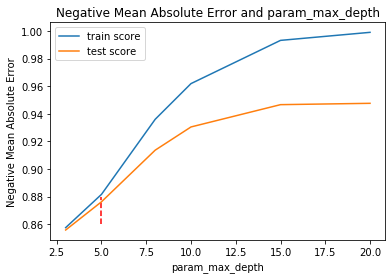

In [70]:
# plotting mean test and train scoes with alpha 
cv_results['param_max_depth'] = cv_results['param_max_depth'].astype('int32')

# plotting
plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.xlabel('param_max_depth')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and param_max_depth")
plt.legend(['train score', 'test score'], loc='upper left')
plt.vlines(x=5,ymax=0.88,ymin=0.86,color='red',linestyles='--')
plt.show()


### The Optimal Point seems to be 'max_depth' = 5 , after which train and test score diverges faster

In [71]:
# Building model with 'max_depth' =10
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train_res, y_train_res)
y_pred=dt.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("accuracy: ",accuracy_score(y_test,y_pred))
print("recall: ", recall_score(y_test,y_pred))
print("roc_score: ",roc_auc_score(y_test,y_pred))

[[7269 1165]
 [ 123  381]]
accuracy:  0.8558961736406355
recall:  0.7559523809523809
roc_score:  0.808910503969195


### By Using Decision Tree, we are able to achieve Accuracy: 86%, Recall: 76% and ROC_Score: 81%
    

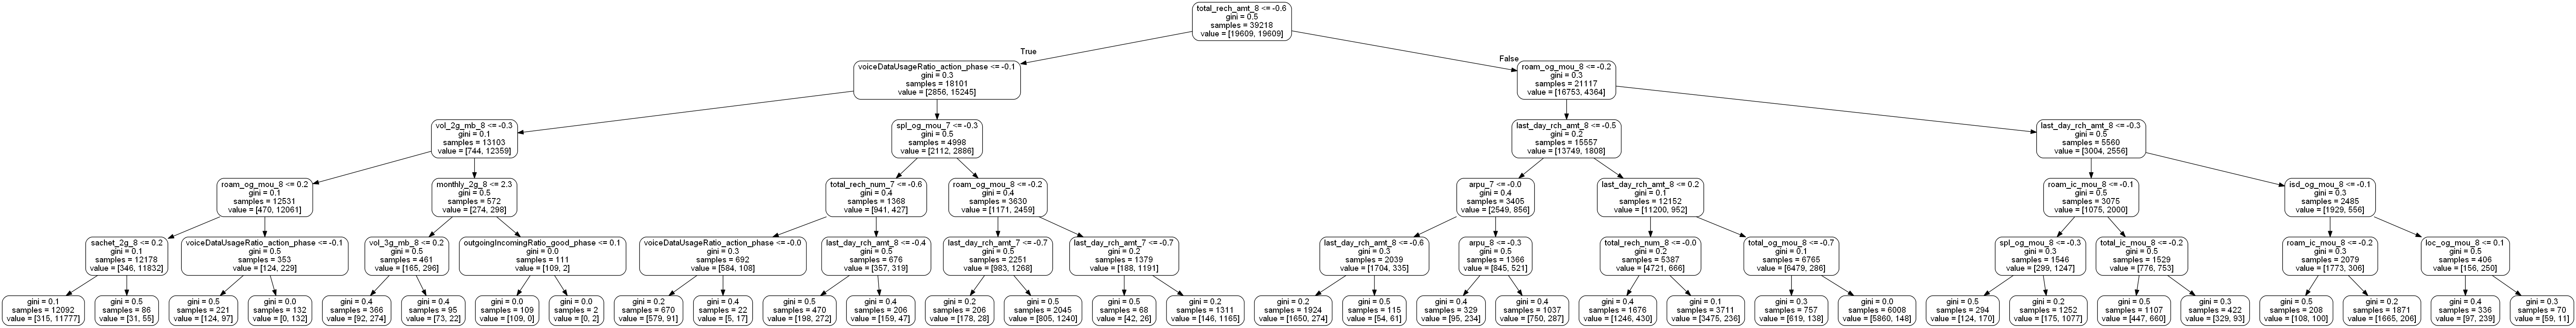

In [72]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image
# Pull out one tree from the forest
#tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(dt, out_file = 'tree.dot', feature_names = X_train_res.columns, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')
Image('tree.png')
# Double clicking on Below image will zoom the image

##### From Above Tree Model Important/deciding factors seemed to be:
    1. Total_rech_amt_8 - Total Recharge amount in month 8
    2. roam_og_mou_8 - Roaming Outgoing minute of use in 8th month
    3. voiceDataUsageRatio_action_phase -Derived metric telling the voice by data usage of the customer
    4. Last_day_rech_amt_8 - Last Day Recharge amount of 8th month
    5. vol_2g_mb_8 - Volume of 2g data used in 8th month

### Plotting aboved found factors

In [73]:
# Dropping some high values to bring clarity in graphs
dfff=pd.concat([X,y],axis=1)
dfff=dfff.drop(index=dfff[dfff.total_rech_amt_8>7000].index)

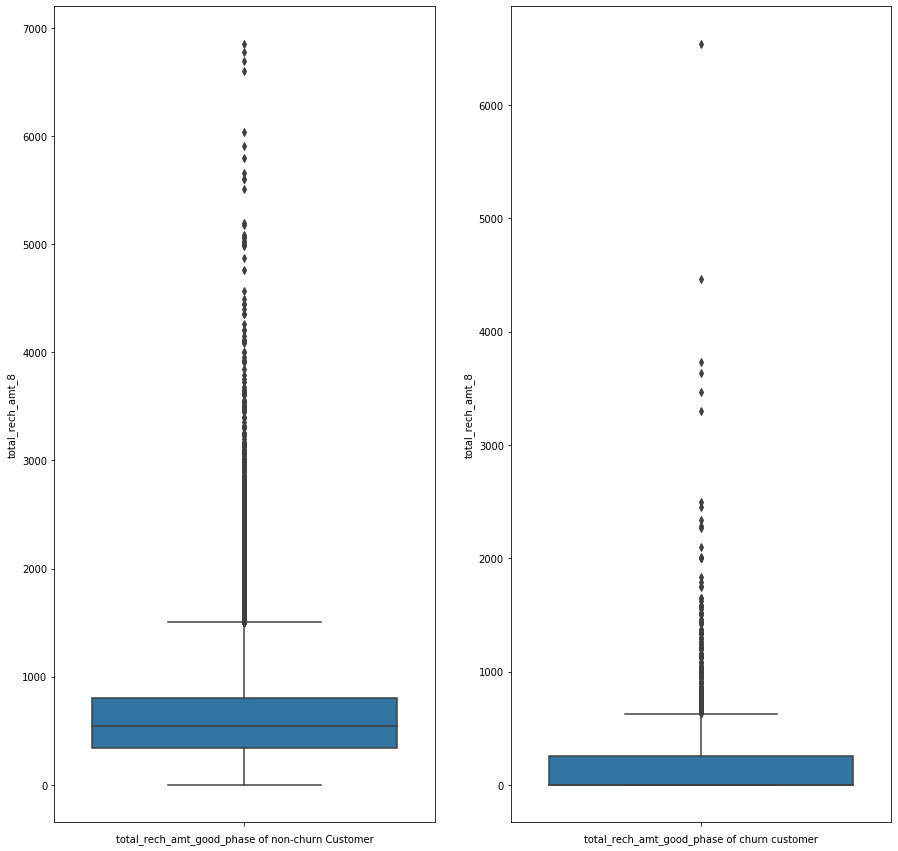

In [74]:
# Comparing Total Recharge amount in action phase of churn and Non churn user
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,15))
# plt.ylim(0, 20000)
sns.boxplot(y=(dfff[(dfff.churned==0 )].total_rech_amt_8),ax=ax1).set(xlabel='total_rech_amt_good_phase of non-churn Customer')
sns.boxplot(y=(dfff[(dfff.churned==1 )].total_rech_amt_8),ax=ax2).set(xlabel='total_rech_amt_good_phase of churn customer')
plt.show()

#### Clearly 'total_rech_amt_good_phase' of churn customer is much loawer than non-churn customer

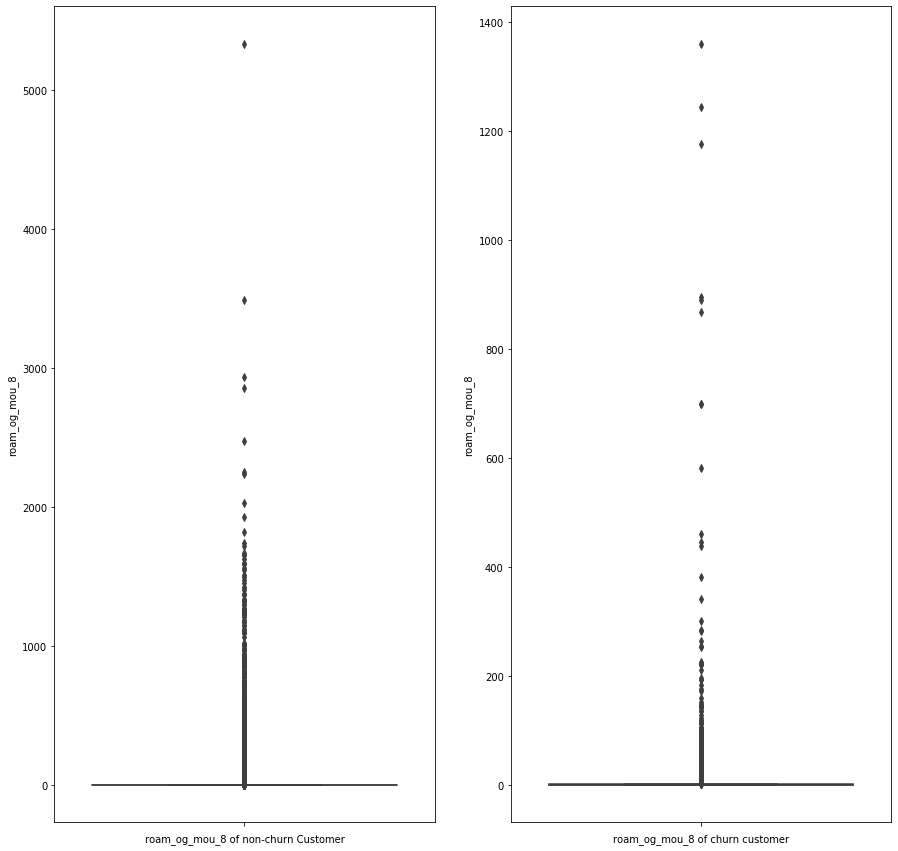

In [75]:

# Comparing Total Recharge amount in action phase of churn and Non churn user
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,15))
# plt.ylim(0, 20000)
sns.boxplot(y=(dfff[(dfff.churned==0 )].roam_og_mou_8),ax=ax1).set(xlabel='roam_og_mou_8 of non-churn Customer')
sns.boxplot(y=(dfff[(dfff.churned==1 )].roam_og_mou_8),ax=ax2).set(xlabel='roam_og_mou_8 of churn customer')
plt.show()

#### Clearly roam_og_mou_8 for churn customer is much lower as range and density at higher ranges is very low for churn customers

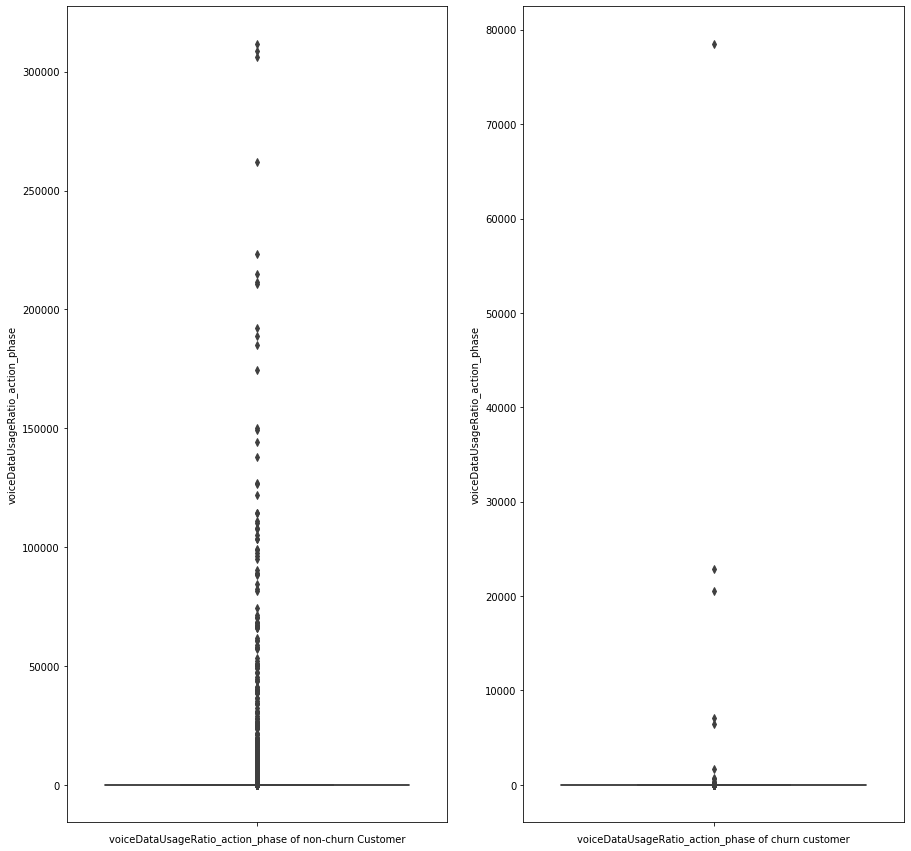

In [76]:
# Comparing Total Recharge amount in action phase of churn and Non churn user
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,15))
sns.boxplot(y=(dfff[(dfff.churned==0 )].voiceDataUsageRatio_action_phase),ax=ax1).set(xlabel='voiceDataUsageRatio_action_phase of non-churn Customer')
sns.boxplot(y=(dfff[(dfff.churned==1 )].voiceDataUsageRatio_action_phase),ax=ax2).set(xlabel='voiceDataUsageRatio_action_phase of churn customer')
plt.show()

Clearly, Range and density at higher values are much greater for non-churn customer. showing voice/data ratio is much more in non-churn users

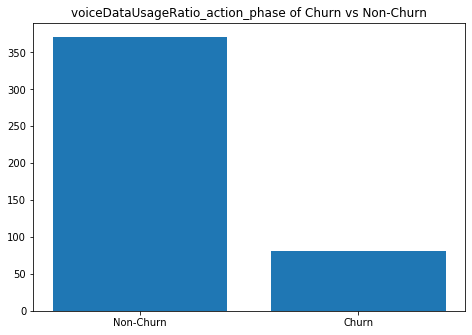

In [77]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1],title='voiceDataUsageRatio_action_phase of Churn vs Non-Churn')
data1 = [dfff[(dfff.churned==0 )].voiceDataUsageRatio_action_phase.mean(),dfff[(dfff.churned==1 )].voiceDataUsageRatio_action_phase.mean()]
label=['Non-Churn','Churn']
ax1.bar(label,data1)

plt.show()

#### Clearly Non-Churn USage of Voice call is much much higher in action phase (Also seen in previous graphs)

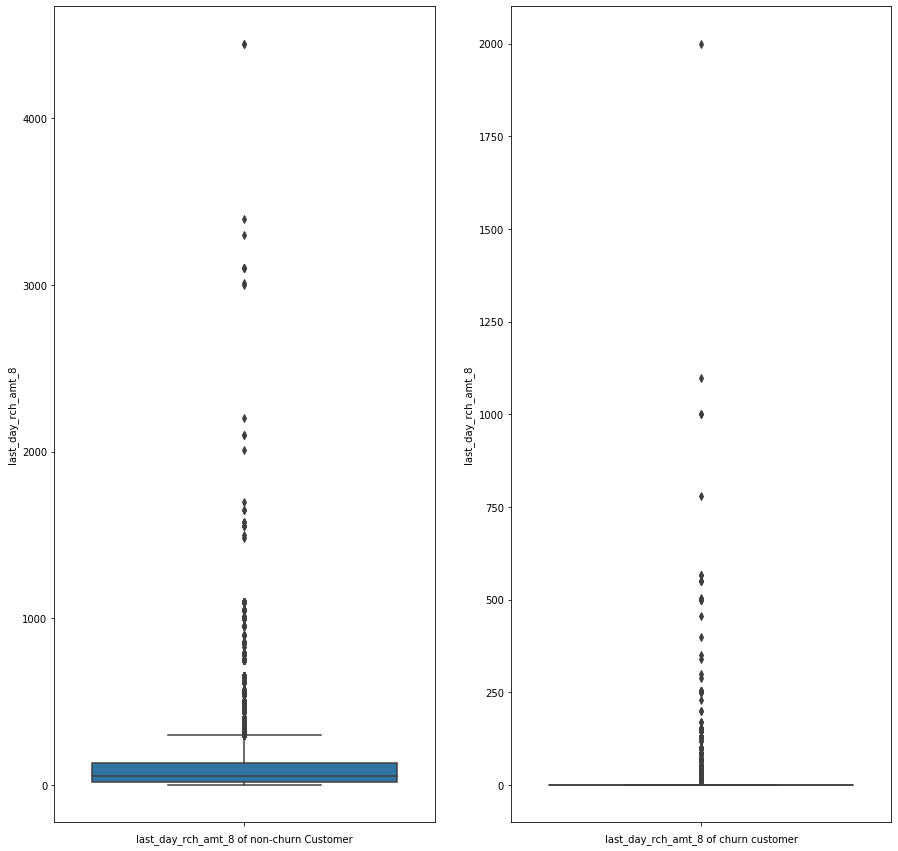

In [78]:
# Box plot of last_day_rch_amt_8
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,15))
sns.boxplot(y=(dfff[(dfff.churned==0 )].last_day_rch_amt_8),ax=ax1).set(xlabel='last_day_rch_amt_8 of non-churn Customer')
sns.boxplot(y=(dfff[(dfff.churned==1 )].last_day_rch_amt_8),ax=ax2).set(xlabel='last_day_rch_amt_8 of churn customer')
plt.show()

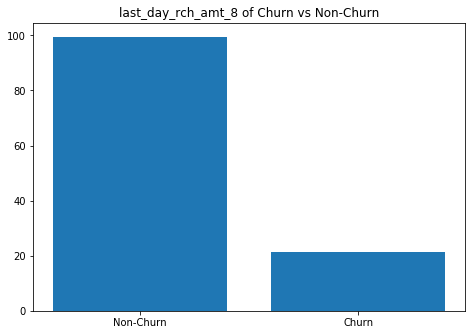

In [79]:
# Bar chart plot of last_day_rch_amt_8 mean for both churn and non-churn
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1],title='last_day_rch_amt_8 of Churn vs Non-Churn')
data1 = [dfff[(dfff.churned==0 )].last_day_rch_amt_8.mean(),dfff[(dfff.churned==1 )].last_day_rch_amt_8.mean()]
label=['Non-Churn','Churn']
ax1.bar(label,data1)

plt.show()

#### Last Day Recharge amount in action phase is much much Lower for churn customers

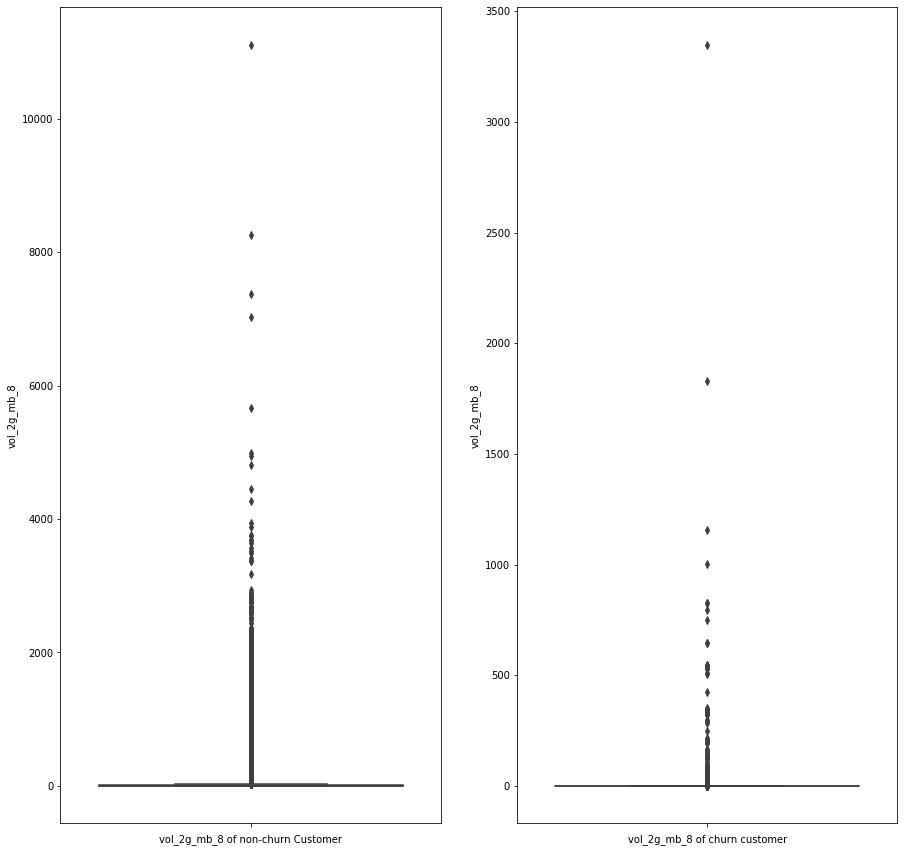

In [80]:
# Box plot of vol_2g_mb_8
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,15))
sns.boxplot(y=(dfff[(dfff.churned==0 )].vol_2g_mb_8),ax=ax1).set(xlabel='vol_2g_mb_8 of non-churn Customer')
sns.boxplot(y=(dfff[(dfff.churned==1 )].vol_2g_mb_8),ax=ax2).set(xlabel='vol_2g_mb_8 of churn customer')
plt.show()

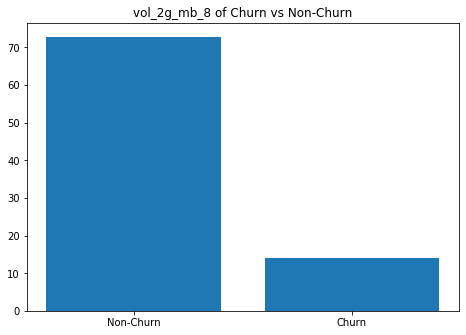

In [81]:
# Bar chart plot of vol_2g_mb_8 mean for both churn and non-churn
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1],title='vol_2g_mb_8 of Churn vs Non-Churn')
data1 = [dfff[(dfff.churned==0 )].vol_2g_mb_8.mean(),dfff[(dfff.churned==1 )].vol_2g_mb_8.mean()]
label=['Non-Churn','Churn']
ax1.bar(label,data1)

plt.show()

#### Similarly, Churn customer have much much lower usage of 2G data

### Data Modelling -Prediction

### Performing PCA

#### 2D projection of PCA

In [82]:
from sklearn.decomposition import PCA
# 2D projection of PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train_res)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
pcaDf = pd.concat([principalDf, pd.Series(y_train_res)], axis = 1)
pcaDf.columns=['principal component 1','principal component 2','churned']

In [83]:
pcaDf.head()

principal component 1  principal component 2  churned
0               0.154851              -0.838600      0.0
1              -1.012837              -0.626739      0.0
2               0.691183              -1.248566      0.0
3              -2.550456              -0.107594      0.0
4               4.602175              -2.026446      0.0

#### Visualize PCA

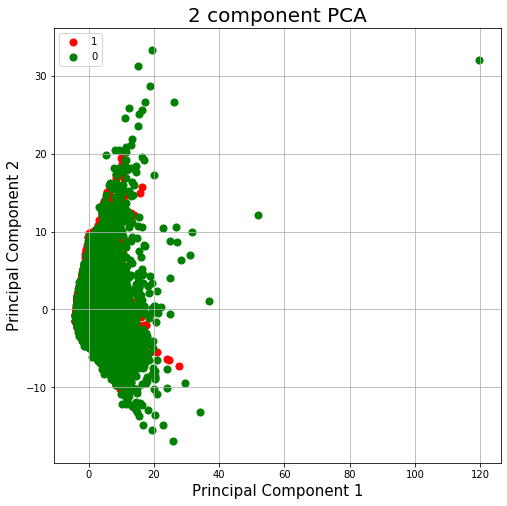

In [84]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = pcaDf['churned'] == target
    ax.scatter(pcaDf.loc[indicesToKeep, 'principal component 1']
               , pcaDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### PCA can't be visualized in 2-dimensions. I think it need many more dimensions for it's representations

In [85]:
pca2 = PCA(random_state=50)
principalComponents = pca2.fit(X_train_res)


In [86]:
print(pca2.components_.shape)
pca2.explained_variance_ratio_


(135, 135)


array([9.79754014e-02, 8.69662821e-02, 5.32476762e-02, 4.40828989e-02,
       4.23220310e-02, 4.00184164e-02, 3.92437930e-02, 3.18188943e-02,
       2.78114233e-02, 2.52577270e-02, 2.28890902e-02, 2.23153977e-02,
       1.90672578e-02, 1.79428931e-02, 1.69250576e-02, 1.62552977e-02,
       1.58406099e-02, 1.50181445e-02, 1.44335287e-02, 1.33495984e-02,
       1.29920446e-02, 1.15708055e-02, 1.12738374e-02, 1.10590659e-02,
       9.67144802e-03, 9.15234932e-03, 8.89628237e-03, 8.84131255e-03,
       8.62087346e-03, 8.29793696e-03, 8.03754607e-03, 7.90486389e-03,
       7.68175783e-03, 7.49398025e-03, 7.27089794e-03, 7.10837908e-03,
       6.64800525e-03, 6.16800106e-03, 6.01957049e-03, 5.95152331e-03,
       5.84856272e-03, 5.67974737e-03, 5.48057898e-03, 5.33122776e-03,
       5.28332256e-03, 5.10183225e-03, 4.99730195e-03, 4.97733492e-03,
       4.81806437e-03, 4.76969699e-03, 4.64549475e-03, 4.37057669e-03,
       4.33066963e-03, 4.18218020e-03, 4.13799746e-03, 3.74823351e-03,
      

#### Plotting PCA variance coverage

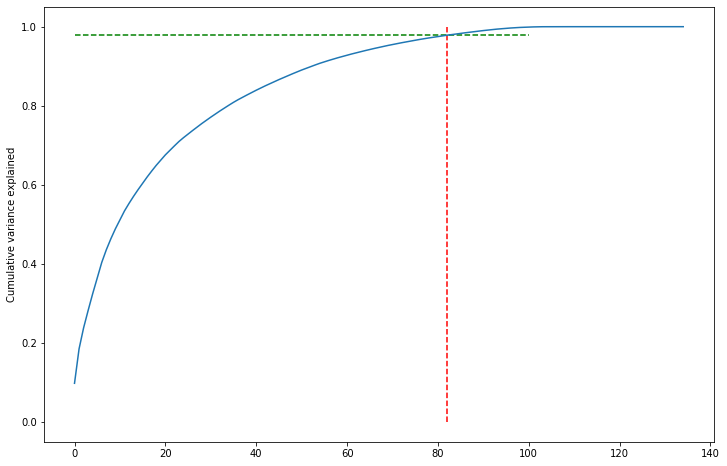

In [87]:
var_cumu = np.cumsum(pca2.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=82, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.98, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()


### 82 features are able to explain 98% of variance in Data

### PCA with 82 features

In [88]:
pca = PCA(n_components=82,random_state=50)
X_train_pca = pca.fit_transform(X_train_res)
X_test_pca = pca.transform(X_test)

### Logistic Regression

In [89]:
# using grid search to find hyperparameter C

params = {'C': [0.001, 0.01, 0.1,1,10]}
gd_sr_pca = GridSearchCV(estimator=LogisticRegression(),
                     param_grid=params,
                     scoring='recall',
                     cv=5,
                     n_jobs=-1,
                     return_train_score=True,
                     verbose = 1)
gd_sr_pca.fit(X_train_pca,y_train_res)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.1s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             return_train_score=True, scoring='recall', verbose=1)

In [90]:
cv_results = pd.DataFrame(gd_sr_pca.cv_results_)
cv_results.head(10)


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.665975      0.037499         0.015559        0.001622   0.001   
1       0.921866      0.170230         0.010572        0.000489    0.01   
2       0.996351      0.111749         0.010577        0.001069     0.1   
3       0.978560      0.103488         0.008977        0.001669       1   
4       0.813856      0.205913         0.005385        0.000798      10   

         params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.001}           0.851606           0.863590           0.864100   
1   {'C': 0.01}           0.859255           0.871239           0.869709   
2    {'C': 0.1}           0.860275           0.874044           0.872259   
3      {'C': 1}           0.861040           0.873789           0.872769   
4     {'C': 10}           0.861040           0.873789           0.872514   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.864830  ...         0.863073        0.006365                5   
1           0.870441  ...         0.870213        0.006717                4   
2           0.872226  ...         0.872049        0.006795                3   
3           0.872482  ...         0.872304        0.006523                1   
4           0.872482  ...         0.872253        0.006520                2   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.865239            0.864538            0.864028   
1            0.872888            0.871805            0.871996   
2            0.874928            0.872952            0.874610   
3            0.875247            0.873271            0.874865   
4            0.875375            0.873143            0.874865   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.863080            0.863709          0.864119         0.000733  
1            0.869901            0.869829          0.871284         0.001215  
2            0.871749            0.871805          0.873209         0.001348  
3            0.872323            0.872123          0.873566         0.001283  
4            0.872387            0.872187          0.873591         0.001298  

[5 rows x 21 columns]

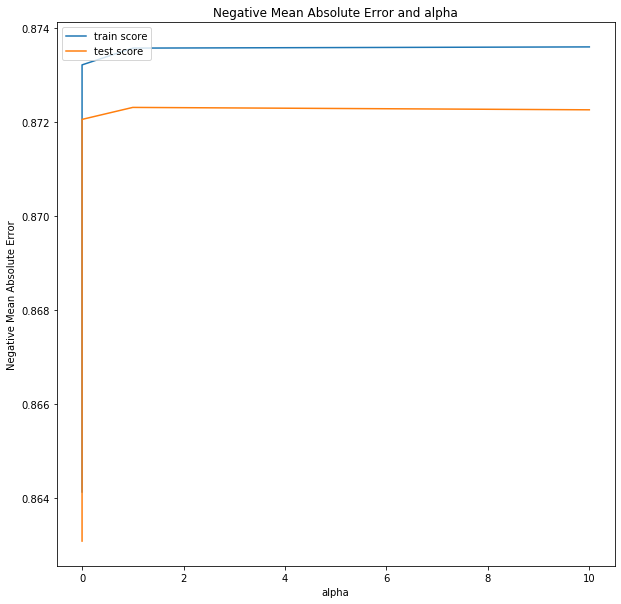

In [91]:
# plotting mean test and train scoes with alpha 
cv_results['param_C'] = cv_results['param_C'].astype('int32')
# plotting
plt.figure(figsize=(10,10))
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')

plt.show()

### We can see a peak point at C=1

In [92]:
lr_pca= LogisticRegression(C=1,random_state=50)
lr_pca.fit(X_train_pca,y_train_res)
y_pred=lr_pca.predict(X_test_pca)

In [93]:
print(confusion_matrix(y_test,y_pred))
print("accuracy: ",accuracy_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred))
print("roc_score: ",roc_auc_score(y_test,y_pred))

[[7088 1346]
 [  81  423]]
accuracy:  0.8403445961065116
recall:  0.8392857142857143
roc_score:  0.8398467935905688


### After Using PCA we got Recall , Accuracy  and roc_score of Approximately 84%

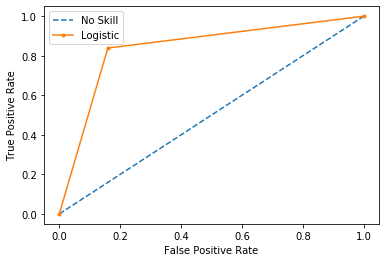

In [94]:
# Plotting ROC

ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### RANDOM FOREST with PCA

In [95]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 500, random_state = 42,max_depth=4)
# Train the model on training data
rf.fit(X_train_pca, y_train_res);

In [96]:
# Use the forest's predict method on the test data
y_pred = rf.predict(X_test_pca)

In [107]:
X_train_pca.shape

(39218, 82)

In [ ]:
X_tes

In [97]:
print(confusion_matrix(y_test,y_pred))
print("accuracy: ",accuracy_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred))
print("roc_score: ",roc_auc_score(y_test,y_pred))

[[7166 1268]
 [ 130  374]]
accuracy:  0.8435891698366524
recall:  0.7420634920634921
roc_score:  0.7958598228636171


#### Using Random forest with PCA gave 
1. 84% Accuracy
2. 74% recall
3. 80% roc_score

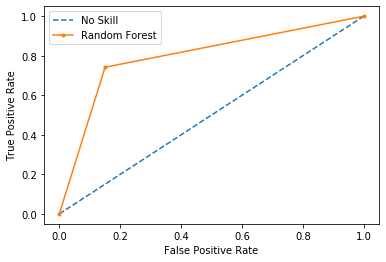

In [98]:
# Plotting ROC

ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### ADABoost with PCA

In [99]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))
params={'n_estimators':[50,80,90,100,200]}

In [100]:
# Finding best number of trees ('n_estimators') using grid serch
gs=GridSearchCV(estimator=classifier,
                     param_grid=params,
                     scoring='recall',
                     cv=2,
                     n_jobs=-1,
                     return_train_score=True,
                     verbose = 1)
gs.fit(X_train_pca,y_train_res)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   32.8s remaining:   21.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.2min finished


GridSearchCV(cv=2,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1)),
             n_jobs=-1, param_grid={'n_estimators': [50, 80, 90, 100, 200]},
             return_train_score=True, scoring='recall', verbose=1)

In [101]:
cv_results = pd.DataFrame(gs.cv_results_)
cv_results.head(10)


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      17.237531      0.179520         0.818321        0.013963   
1      27.395063      0.494705         1.020556        0.090497   
2      30.716275      0.196984         0.987649        0.009220   
3      33.736310      0.273279         0.834294        0.035396   
4      49.886436      0.125675         1.546959        0.026928   

  param_n_estimators                 params  split0_test_score  \
0                 50   {'n_estimators': 50}           0.846899   
1                 80   {'n_estimators': 80}           0.852305   
2                 90   {'n_estimators': 90}           0.855059   
3                100  {'n_estimators': 100}           0.857201   
4                200  {'n_estimators': 200}           0.869237   

   split1_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.860071         0.853485        0.006586                5   
1           0.865375         0.858840        0.006535                4   
2           0.866191         0.860625        0.005566                3   
3           0.866599         0.861900        0.004699                2   
4           0.878735         0.873986        0.004749                1   

   split0_train_score  split1_train_score  mean_train_score  std_train_score  
0            0.862621            0.860057          0.861339         0.001282  
1            0.871086            0.869033          0.870060         0.001027  
2            0.874044            0.872297          0.873170         0.000873  
3            0.875370            0.873011          0.874190         0.001179  
4            0.895665            0.892697          0.894181         0.001484

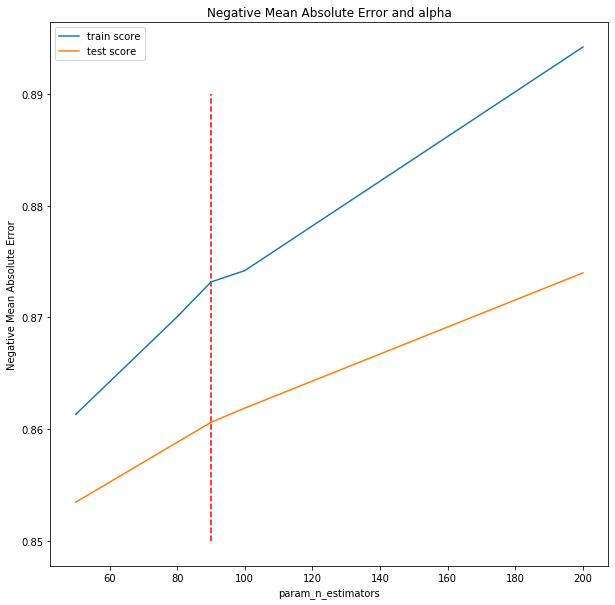

In [102]:
# plotting mean test and train scoes with alpha 
cv_results['param_n_estimators'] = cv_results['param_n_estimators'].astype('int32')
# plotting
plt.figure(figsize=(10,10))
plt.plot(cv_results['param_n_estimators'], cv_results['mean_train_score'])
plt.plot(cv_results['param_n_estimators'], cv_results['mean_test_score'])
plt.xlabel('param_n_estimators')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.vlines(x=90,ymin=0.85,ymax=0.89,linestyles='dashed',colors='red')
plt.show()

### Best 'n_estimators' seems to be at 90 where train and test starts to diverge

In [103]:
classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=90)
classifier.fit(X_train_pca, y_train_res)
y_pred= classifier.predict(X_test_pca);

In [104]:
print(confusion_matrix(y_test,y_pred))
print("accuracy: ",accuracy_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred))
print("roc_score: ",roc_auc_score(y_test,y_pred))

[[7246 1188]
 [ 100  404]]
accuracy:  0.8558961736406355
recall:  0.8015873015873016
roc_score:  0.8303644357118392


### AdaBoost gives 86% Accuracy, 80% recall and 83% roc_score

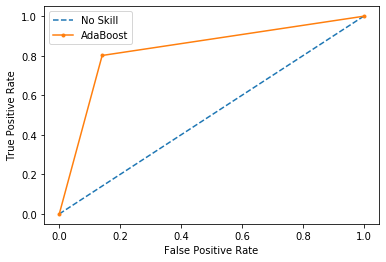

In [105]:
# Plotting ROC

ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='AdaBoost')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [106]:
print("precision: ",precision_score(y_test,y_pred))

precision:  0.2537688442211055


### Logistic regression and AdaBoost  seems to be good model for using as predictor in terms of Accuracy.
#### Logistic Regression has better recall i.e 84% while AdaBoost has better Accuracy 86%
#### But we will give preference to recall, as we do not want any churn customer to be missed.
#### Logistic Regression model is light , but is linear model, however it is better suitable here .
#### Precision of AdaBoost is coming out to be low(between 20-30)  however for logistic regression it
#### is between 60-70

### So we choose Logistic Regression as our final Prediction model in this case


### Recomendation

#### Based on above plots and the features predicted by decision tree we can see that among high value consumers which have very low incoming minutes of usage are very susceptible to churn, and a high cluster of them is located where they have very limited usage in either roaming outgoing calls or data usage or local_outgoing calls.
#### So our recommendation to business would be to give these high value customers better offer in terms of data plans or outgoing call offers both local and when they are in roaming. It makes sense in terms that high vlaue customers might have travel obligations around the country and they 